# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
city_name = []
cloudiness = []
countries = []
date = []
humidity = []
lat = []
lng_list = []
temp = []
wind_speed = []
index_counter = 0
set_counter = 1

print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        countries.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping to next one.")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : ushuaia
Processing Record 2 of Set 1 : albany
Processing Record 3 of Set 1 : busselton
Processing Record 4 of Set 1 : naze
Processing Record 5 of Set 1 : gimli
Processing Record 6 of Set 1 : carnarvon
Processing Record 7 of Set 1 : ukiah
Processing Record 8 of Set 1 : provideniya
Processing Record 9 of Set 1 : rikitea
Processing Record 10 of Set 1 : hermanus
Processing Record 11 of Set 1 : barrow
Processing Record 12 of Set 1 : port alfred
Processing Record 13 of Set 1 : lagoa
Processing Record 14 of Set 1 : dongsheng
Processing Record 15 of Set 1 : batagay-alyta
Processing Record 16 of Set 1 : basqal
Processing Record 17 of Set 1 : atuona
Processing Record 18 of Set 1 : cape town
Processing Record 19 of Set 1 : mancora
Processing Record 20 of Set 1 : la sarre
Processing Record 21 of Set 1 : butaritari
Processing Record 22 of Set 1 : ojinaga
Processing Record 23 of Set 1 : ribeira grande
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
weather_df = pd.DataFrame({ 
                "City" : city_name,
                "Cloudiness" : cloudiness,
                "Country" : countries,
                "Date" : date,
                "Humidity" : humidity,
                "Lat" : lat,
                "Lng" : lng_list,
                "Max Temp" : temp,
                "Wind Speed" : wind_speed
})
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,75,AR,1627236302,100,-54.8000,-68.3000,33.46,21.85
1,Albany,94,US,1627236427,74,42.6001,-73.9662,81.27,6.62
2,Busselton,44,AU,1627236428,66,-33.6500,115.3333,58.08,19.44
3,Naze,100,JP,1627236428,88,28.3667,129.4833,77.97,18.72
4,Gimli,18,CA,1627236428,33,50.6336,-96.9907,84.43,16.13
...,...,...,...,...,...,...,...,...,...
572,Santa Lucía,20,ES,1627236585,65,27.9117,-15.5407,69.12,29.93
573,Hongjiang,0,CN,1627236585,94,27.1100,109.9956,73.72,0.54
574,Ardakān,0,IR,1627236586,10,32.3100,54.0175,97.18,6.38
575,Stornoway,53,GB,1627236586,82,58.2093,-6.3865,62.92,10.36


In [21]:
weather_df.to_csv("output_data/cities.csv", index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

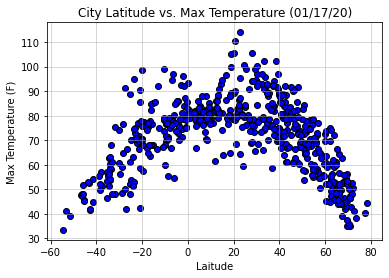

In [22]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "blue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

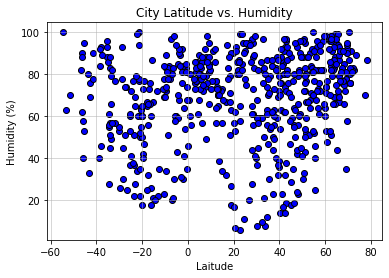

In [23]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "blue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

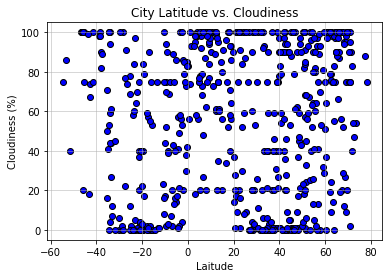

In [24]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "blue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

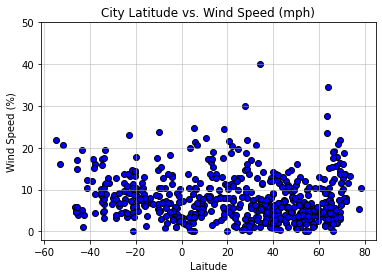

In [25]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "blue", edgecolor = "black")

#Set title
plt.title("City Latitude vs. Wind Speed (mph)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.7


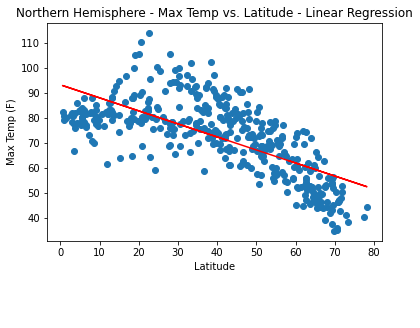

In [32]:
# Create Northern and Southern Hemisphere DataFrames
n_hem = weather_df.loc[weather_df["Lat"] >= 0]
s_hem = weather_df.loc[weather_df["Lat"] < 0]

# Define function for creating linear agression and scatter plot
def lin_reg(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def notes(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    

# Call an function #1
equation = lin_reg(n_hem["Lat"], n_hem["Max Temp"])

# Call an function #2
notes(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude - Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.75


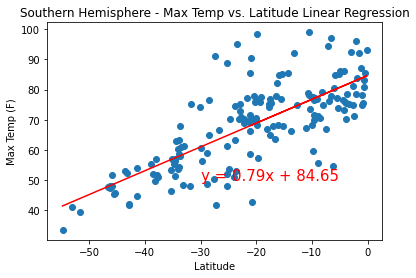

In [35]:
# Call an function #1
equation = lin_reg(s_hem["Lat"],s_hem["Max Temp"])

# Call an function #2
notes(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.1


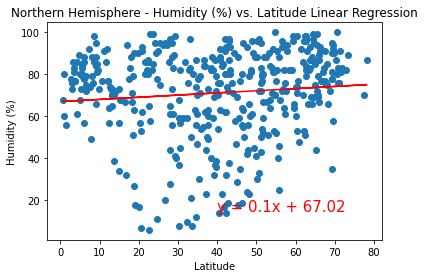

In [37]:
# Call an function #1
equation = lin_reg(n_hem["Lat"], n_hem["Humidity"])

# Call an function #2
notes(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.05


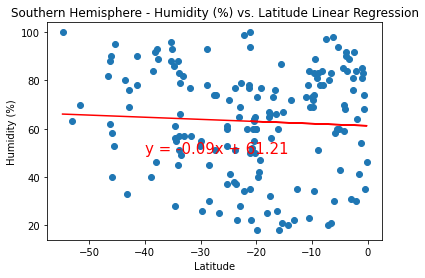

In [39]:
# Call an function #1
equation = lin_reg(s_hem["Lat"], s_hem["Humidity"])

# Call an function #2
notes(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.01


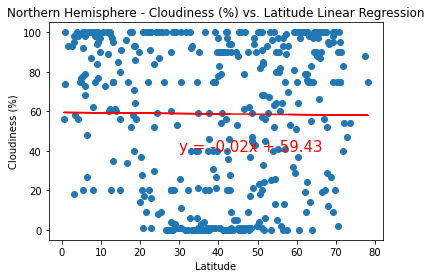

In [40]:
# Call an function #1
equation = lin_reg(n_hem["Lat"], n_hem["Cloudiness"])

# Call an function #2
notes(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.2


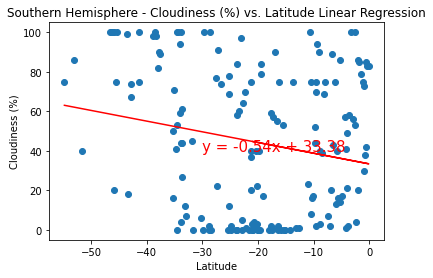

In [42]:
# Call an function #1
equation = lin_reg(s_hem["Lat"], s_hem["Cloudiness"])

# Call an function #2
notes(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.04


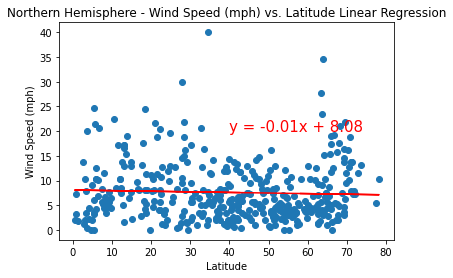

In [43]:
# Call an function #1
equation = lin_reg(n_hem["Lat"], n_hem["Wind Speed"])

# Call an function #2
notes(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.29


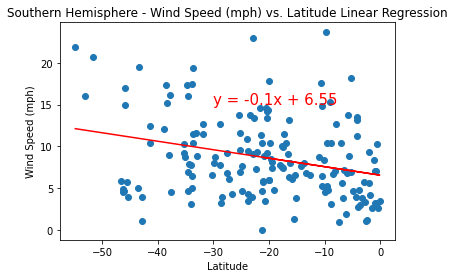

In [44]:
# Call an function #1
equation = lin_reg(s_hem["Lat"], s_hem["Wind Speed"])

# Call an function #2
notes(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")